In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df=pd.read_csv('emails.csv')

In [136]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [137]:
df.isnull().sum()

,0
text,0
spam,0


In [138]:
df.duplicated().sum()

33

In [139]:
df.drop_duplicates(inplace=True)

In [140]:
df.shape

(5695, 2)

In [141]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [142]:
df['spam'].value_counts()

,count
spam,
0,4327
1,1368


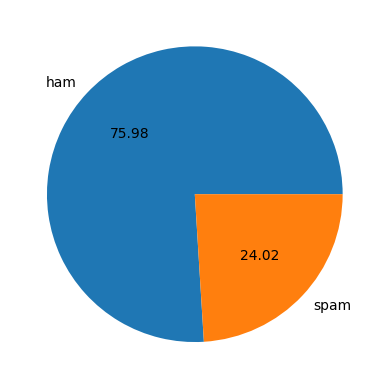

In [143]:
plt.pie(df['spam'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [144]:
!pip install nltk

In [145]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [146]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,spam,num_sentence
0,Subject: naturally irresistible your corporate...,1,11
1,Subject: the stock trading gunslinger fanny i...,1,1
2,Subject: unbelievable new homes made easy im ...,1,4
3,Subject: 4 color printing special request add...,1,5
4,"Subject: do not have money , get software cds ...",1,9


In [147]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,text,spam,num_sentence,num_word
0,Subject: naturally irresistible your corporate...,1,11,325
1,Subject: the stock trading gunslinger fanny i...,1,1,90
2,Subject: unbelievable new homes made easy im ...,1,4,88
3,Subject: 4 color printing special request add...,1,5,99
4,"Subject: do not have money , get software cds ...",1,9,53


In [148]:
df['num_char']=df['text'].apply(lambda x:len(x))
df.head()

,text,spam,num_sentence,num_word,num_char
0,Subject: naturally irresistible your corporate...,1,11,325,1484
1,Subject: the stock trading gunslinger fanny i...,1,1,90,598
2,Subject: unbelievable new homes made easy im ...,1,4,88,448
3,Subject: 4 color printing special request add...,1,5,99,500
4,"Subject: do not have money , get software cds ...",1,9,53,235


In [149]:
df.describe()

,spam,num_sentence,num_word,num_char
count,5695.000000,5695.000000,5695.000000,5695.000000
mean,0.240211,19.462511,328.214047,1558.067076
std,0.427249,35.981993,419.654234,2047.078711
min,0.000000,1.000000,3.000000,13.000000
25%,0.000000,7.000000,102.000000,508.500000
50%,0.000000,12.000000,211.000000,979.000000
75%,0.000000,22.000000,403.000000,1893.000000
max,1.000000,1565.000000,8479.000000,43952.000000


In [150]:
df[['num_sentence','num_word','num_char']].describe()

,num_sentence,num_word,num_char
count,5695.000000,5695.000000,5695.000000
mean,19.462511,328.214047,1558.067076
std,35.981993,419.654234,2047.078711
min,1.000000,3.000000,13.000000
25%,7.000000,102.000000,508.500000
50%,12.000000,211.000000,979.000000
75%,22.000000,403.000000,1893.000000
max,1565.000000,8479.000000,43952.000000


In [151]:
df[df['spam']==0].describe()

,spam,num_sentence,num_word,num_char
count,4327.0,4327.000000,4327.000000,4327.000000
mean,0.0,19.838225,347.283799,1634.200139
std,0.0,38.124564,407.227757,1965.016383
min,0.0,1.000000,3.000000,13.000000
25%,0.0,7.000000,120.000000,577.500000
50%,0.0,13.000000,240.000000,1122.000000
75%,0.0,22.000000,440.500000,2037.500000
max,0.0,1565.000000,8479.000000,43952.000000


In [152]:
df[df['spam']==1].describe()

,spam,num_sentence,num_word,num_char
count,1368.0,1368.000000,1368.000000,1368.000000
mean,1.0,18.274123,267.896199,1317.257310
std,0.0,28.130434,451.623124,2271.372893
min,1.0,1.000000,5.000000,18.000000
25%,1.0,6.000000,80.000000,401.500000
50%,1.0,11.000000,141.000000,693.500000
75%,1.0,18.000000,252.000000,1250.250000
max,1.0,438.000000,6131.000000,28432.000000


<Axes: xlabel='num_sentence', ylabel='Count'>

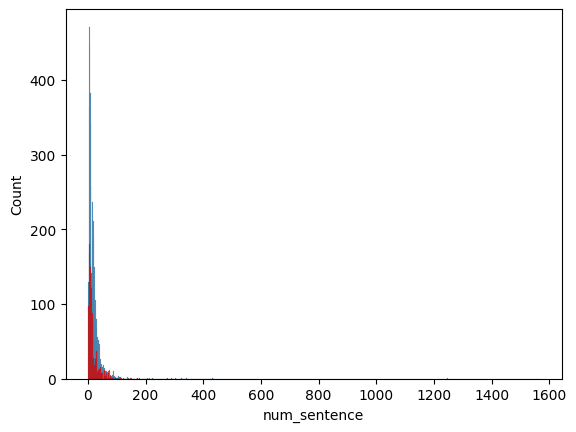

In [153]:
sns.histplot(df[df['spam']==0]['num_sentence'])
sns.histplot(df[df['spam']==1]['num_sentence'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

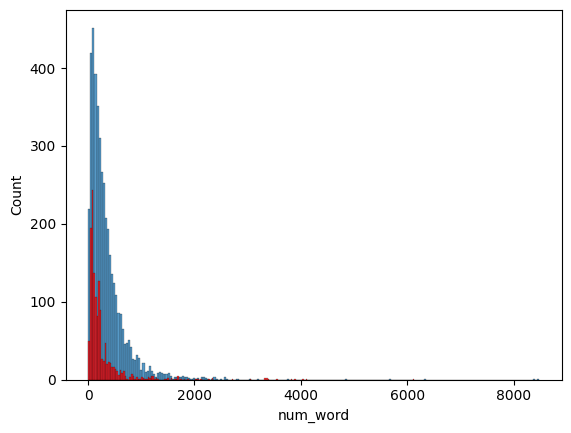

In [154]:
sns.histplot(df[df['spam']==0]['num_word'])
sns.histplot(df[df['spam']==1]['num_word'],color='red')

<Axes: xlabel='num_char', ylabel='Count'>

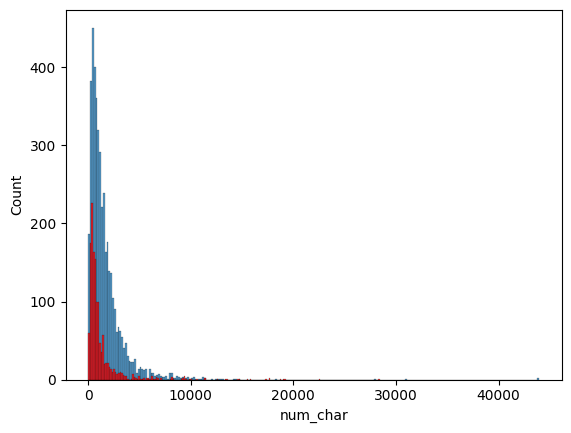

In [155]:
sns.histplot(df[df['spam']==0]['num_char'])
sns.histplot(df[df['spam']==1]['num_char'],color='red')

<Axes: >

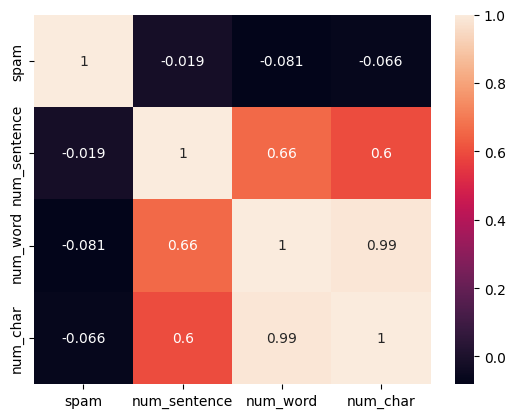

In [156]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [157]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  res=[]

  for i in text:
    if i.isalnum():
      res.append(i)
  text=res[:]
  res.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      res.append(i)
  text=res[:]
  res.clear()

  for i in text:
    res.append(ps.stem(i))
  return " ".join(res)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
df['transformed_text']=df['text'].apply(transform_text)

In [159]:
df.head()

,text,spam,num_sentence,num_word,num_char,transformed_text
0,Subject: naturally irresistible your corporate...,1,11,325,1484,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,1,90,598,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,4,88,448,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,5,99,500,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,9,53,235,subject money get softwar cd softwar compat gr...


In [160]:
spam=[]
for message in df[df['spam']==1]['transformed_text'].tolist():
  for word in message.split():
    spam.append(word)

In [161]:
len(spam)

174630

In [162]:
from collections import Counter
Counter(spam).most_common(100)

[('subject', 1577),
 ('compani', 1065),
 ('com', 1000),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 701),
 ('get', 694),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('free', 606),
 ('3', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520),
 ('report', 507),
 ('websit', 506),
 ('new', 504),
 ('list', 503),
 ('price', 503),
 ('may', 489),
 ('adob', 462),
 ('address', 461),
 ('site', 455),
 ('0', 450),
 ('messag', 445),
 ('softwar', 440),
 ('need', 438),
 ('provid', 435),
 ('account', 428),
 ('www', 426),
 ('product', 421),
 ('day', 420),
 ('want', 420),
 ('work', 415),
 ('10', 405),
 ('look', 396),
 ('servic', 395),
 ('send', 393),
 ('interest', 385),
 ('2005', 374),
 ('like', 372),
 ('year', 366),
 ('custom', 363),
 ('peopl', 359),
 ('4', 358),
 ('b

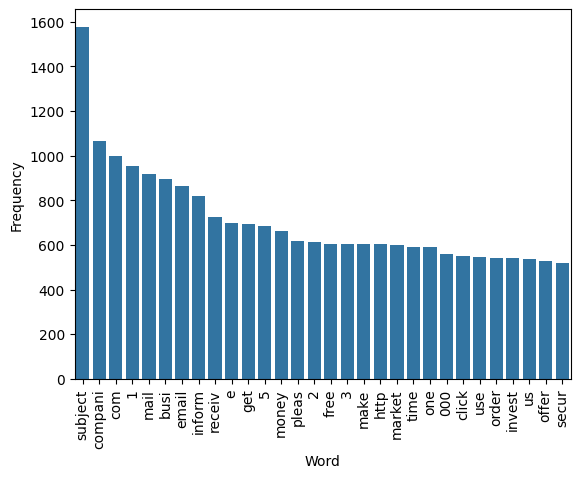

In [163]:
# Assuming 'spam_df' is your DataFrame
spam_df = pd.DataFrame(Counter(spam).most_common(30), columns=['Word', 'Frequency'])
# Create a bar plot using the 'Word' column for the x-axis and 'Frequency' for the y-axis
sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [164]:
ham=[]
for message in df[df['spam']==0]['transformed_text'].tolist():
  for word in message.split():
    ham.append(word)

In [165]:
len(ham)

702991

In [166]:
Counter(spam).most_common(100)

[('subject', 1577),
 ('compani', 1065),
 ('com', 1000),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 701),
 ('get', 694),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('free', 606),
 ('3', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520),
 ('report', 507),
 ('websit', 506),
 ('new', 504),
 ('list', 503),
 ('price', 503),
 ('may', 489),
 ('adob', 462),
 ('address', 461),
 ('site', 455),
 ('0', 450),
 ('messag', 445),
 ('softwar', 440),
 ('need', 438),
 ('provid', 435),
 ('account', 428),
 ('www', 426),
 ('product', 421),
 ('day', 420),
 ('want', 420),
 ('work', 415),
 ('10', 405),
 ('look', 396),
 ('servic', 395),
 ('send', 393),
 ('interest', 385),
 ('2005', 374),
 ('like', 372),
 ('year', 366),
 ('custom', 363),
 ('peopl', 359),
 ('4', 358),
 ('b

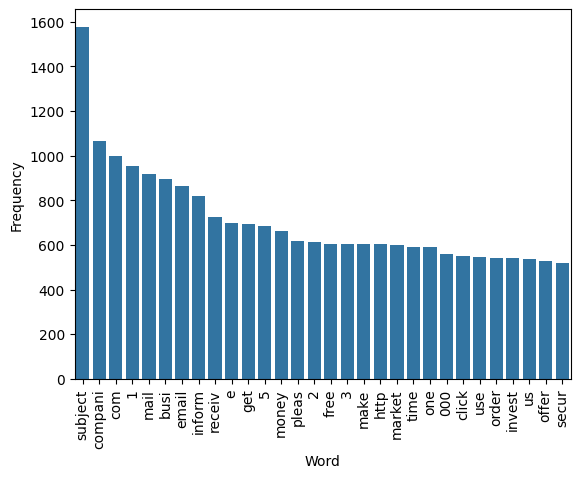

In [167]:
ham_df = pd.DataFrame(Counter(ham).most_common(30), columns=['Word', 'Frequency'])
# Create a bar plot using the 'Word' column for the x-axis and 'Frequency' for the y-axis
sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [168]:
df.head()

,text,spam,num_sentence,num_word,num_char,transformed_text
0,Subject: naturally irresistible your corporate...,1,11,325,1484,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,1,90,598,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,4,88,448,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,5,99,500,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,9,53,235,subject money get softwar cd softwar compat gr...


In [169]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [170]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [171]:
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(5695, 29220)

In [172]:
y=df['spam'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [173]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [174]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [175]:
gnb.fit(X_train,y_train)
gnb_y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,gnb_y_pred))
print(confusion_matrix(y_test,gnb_y_pred))
print(precision_score(y_test,gnb_y_pred))

0.95171202809482
[[834  15]
 [ 40 250]]
0.9433962264150944


In [176]:
import sklearn.metrics
score=sklearn.metrics.r2_score(y_test,gnb_y_pred)
mae=sklearn.metrics.mean_absolute_error(y_test,gnb_y_pred)
mse=sklearn.metrics.mean_squared_error(y_test,gnb_y_pred)
print(score)
print(mae)
print(mse)

0.7455627310019901
0.048287971905179985
0.048287971905179985


In [177]:
mnb.fit(X_train,y_train)
mnb_y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,mnb_y_pred))
print(confusion_matrix(y_test,mnb_y_pred))
print(precision_score(y_test,mnb_y_pred))

0.9929762949956101
[[843   6]
 [  2 288]]
0.9795918367346939


In [178]:
score=sklearn.metrics.r2_score(y_test,mnb_y_pred)
mae=sklearn.metrics.mean_absolute_error(y_test,mnb_y_pred)
mse=sklearn.metrics.mean_squared_error(y_test,mnb_y_pred)
print(score)
print(mae)
print(mse)

0.9629909426911986
0.007023705004389816
0.007023705004389816


In [179]:
bnb.fit(X_train,y_train)
bnb_y_pred=bnb.predict(X_test)
print(accuracy_score(y_test,bnb_y_pred))
print(confusion_matrix(y_test,bnb_y_pred))
print(precision_score(y_test,bnb_y_pred))

0.9885864793678666
[[845   4]
 [  9 281]]
0.9859649122807017


In [180]:
score=sklearn.metrics.r2_score(y_test,bnb_y_pred)
mae=sklearn.metrics.mean_absolute_error(y_test,bnb_y_pred)
mse=sklearn.metrics.mean_squared_error(y_test,bnb_y_pred)
print(score)
print(mae)
print(mse)

0.9398602818731977
0.01141352063213345
0.01141352063213345


In [182]:
def predict_spam(text):
    transformed_text = transform_text(text)
    vector_input = cv.transform([transformed_text]).toarray()
    prediction = mnb.predict(vector_input)
    if prediction == 1:
        print("The input message is SPAM.")
    else:
        print("The input message is NOT SPAM.")
input_text = input("Enter a message to check: ")
predict_spam(input_text)

Enter a message to check: This February, find the perfect cybersecurity courses to match your learning goals!  DETECT > DEFEND > MITIGATE  With our exclusive All-in-One Cyber Defense Bundle, you’ll gain the most in-demand skills in Threat Detection, Digital Forensics, DevSecOps, Cloud Security, and more—for just $2.89 per course. Or unlock the entire 15-course bundle for only $24.89 and get 2 bonus courses for free!  A short month, a limited-time deal—seize this opportunity to build the skills that will set you apart in the cybersecurity field. Get This Offer Before It Ends What’s Included in Our All-in-One Cyber Defense Bundle All-in-One Cyber Defense Bundle		 $399    $24.89 One-Time Payment ➤	access to 15 in-demand cybersecurity courses ➤	2 FREE bonus courses with the bundle ➤	over 60 hours of premium practical learning    ➤	validation of completion for each course   ➤	year-long access to courses  ➤	content updates and premium support for 1 year Get This Limited-Time Offer Now In-Dem